# Beer Reviews

#### This dataset appears to be a collection of various reviews of beers rated on features such as aroma, appearance etc... many different reviewers have contributed and thus some beers have been reviewed many times.

In [23]:
#Import
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set()

In [2]:
df = pd.read_csv('./beer_reviews.csv')

### Let's start with some quick data exploration.

In [3]:
df.head()

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883


In [4]:
df.describe()

,brewery_id,review_time,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv,beer_beerid
count,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.518829e+06,1.586614e+06
mean,3.130099e+03,1.224089e+09,3.815581e+00,3.735636e+00,3.841642e+00,3.743701e+00,3.792860e+00,7.042387e+00,2.171279e+04
std,5.578104e+03,7.654427e+07,7.206219e-01,6.976167e-01,6.160928e-01,6.822184e-01,7.319696e-01,2.322526e+00,2.181834e+04
min,1.000000e+00,8.406720e+08,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e-02,3.000000e+00
25%,1.430000e+02,1.173224e+09,3.500000e+00,3.500000e+00,3.500000e+00,3.500000e+00,3.500000e+00,5.200000e+00,1.717000e+03
50%,4.290000e+02,1.239203e+09,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,6.500000e+00,1.390600e+04
75%,2.372000e+03,1.288568e+09,4.500000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.500000e+00,8.500000e+00,3.944100e+04
max,2.800300e+04,1.326285e+09,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.770000e+01,7.731700e+04


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1586614 entries, 0 to 1586613
Data columns (total 13 columns):
brewery_id            1586614 non-null int64
brewery_name          1586599 non-null object
review_time           1586614 non-null int64
review_overall        1586614 non-null float64
review_aroma          1586614 non-null float64
review_appearance     1586614 non-null float64
review_profilename    1586266 non-null object
beer_style            1586614 non-null object
review_palate         1586614 non-null float64
review_taste          1586614 non-null float64
beer_name             1586614 non-null object
beer_abv              1518829 non-null float64
beer_beerid           1586614 non-null int64
dtypes: float64(6), int64(3), object(4)
memory usage: 157.4+ MB


In [10]:
df.isnull().sum()

brewery_id                0
brewery_name             15
review_time               0
review_overall            0
review_aroma              0
review_appearance         0
review_profilename      348
beer_style                0
review_palate             0
review_taste              0
beer_name                 0
beer_abv              67785
beer_beerid               0
dtype: int64

### Overall this dataset appears analysis ready, with very few missing values in respect to the total number of records.

## 1. Which brewery produces the strongest beers by ABV%?

### We can answer this question by aggregating reviews by brewery and calculating the average ABV value for each.

In [10]:
breweries = df.groupby(['brewery_name']).mean()
breweries.sort_values('beer_abv', ascending = False).head()

,brewery_id,review_time,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv,beer_beerid
brewery_name,,,,,,,,,
Schorschbräu,6513.0,1.219645e+09,3.411765,3.529412,3.558824,3.470588,3.514706,19.228824,34235.676471
Shoes Brewery,14060.0,1.220522e+09,3.000000,3.000000,3.750000,3.500000,3.250000,15.200000,32949.000000
Rome Brewing Company,2873.0,1.095643e+09,4.166667,3.722222,3.777778,3.944444,4.166667,13.840000,16316.666667
Hurlimann Brewery,736.0,1.059959e+09,3.815789,4.342105,3.947368,4.131579,4.236842,13.750000,4341.631579
Alt-Oberurseler Brauhaus,10038.0,1.158903e+09,4.000000,4.000000,4.000000,4.166667,3.833333,13.200000,32879.666667


## Answer: Schorschbräu	Average ABV: 19.22%

#### In future analysis we may want to pay some consideration to eliminating outliers, some beers have much higher ABV values relative to the rest of the sample.

## 2.    Which of the factors (aroma, taste, appearance, palette) are most important in determining the overall quality of a beer?

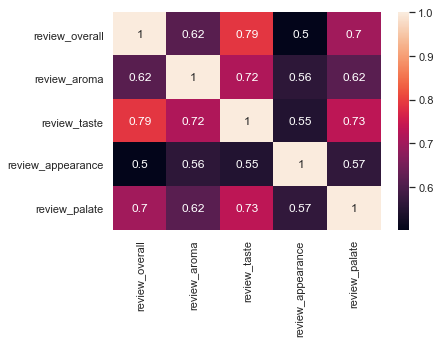

In [21]:
facts = df[['review_overall',
            'review_aroma',
            'review_taste',
            'review_appearance',
            'review_palate'
           ]]

sns.heatmap(facts.corr(), 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
           annot=True)
plt.show()

## Answer: Taste has the highest correlation to overall score (.79)

## 3.    I typically enjoy a beer due to its aroma and appearance, which beer style should I try?

#### To answer this we can group by beer style and calculate an aggregate mean score of aroma and appearance. The highest score is the suggested beer style.

In [50]:
aroma_appearance = df[['beer_style',
                      'review_aroma',
                      'review_appearance']]

agg = aroma_appearance.groupby('beer_style').agg({'review_aroma': np.mean,
                                                 'review_appearance': np.mean})
agg['agg_mean'] = (agg['review_aroma'] + agg['review_appearance'])/2 
agg.sort_values(('agg_mean'), ascending=False).head(1)

,review_aroma,review_appearance,agg_mean
beer_style,,,
American Double / Imperial Stout,4.160665,4.163633,4.162149


## Answer: American Double / Imperial Stout

## 4.    If I typically enjoy Scottish Ales, what other beer style might I like?

In [36]:
all_facts = df.groupby('beer_style').agg({'review_aroma': np.mean,
                              'review_appearance': np.mean,
                              'review_taste': np.mean,
                              'review_palate': np.mean,
                              'beer_abv': np.mean})
all_facts.loc['Scottish Ale']

review_aroma         3.611354
review_appearance    3.806362
review_taste         3.713949
review_palate        3.661831
beer_abv             5.731270
Name: Scottish Ale, dtype: float64

In [49]:
all_facts.query('(3.5 <= review_aroma <= 4.0) & (3.5 <= review_appearance <= 4.0) & (3.5 <= review_taste <= 4.0) & (3.5 <= review_palate <= 4.0) & (5.5 <= beer_abv <= 6.0)')

,review_aroma,review_appearance,review_taste,review_palate,beer_abv
beer_style,,,,,
Altbier,3.624015,3.809327,3.744865,3.713086,5.828578
English Porter,3.841652,3.935446,3.909866,3.788661,5.691896
Extra Special / Strong Bitter (ESB),3.640512,3.833285,3.757989,3.717610,5.768085
Milk / Sweet Stout,3.832713,3.960922,3.894501,3.797661,5.792455
Märzen / Oktoberfest,3.504698,3.719912,3.643009,3.634719,5.866271
Rauchbier,3.946744,3.868753,3.893488,3.781424,5.732731
Roggenbier,3.834764,3.824034,3.919528,3.825107,5.623139
Scottish Ale,3.611354,3.806362,3.713949,3.661831,5.731270
Scottish Gruit / Ancient Herbed Ale,3.741367,3.647037,3.745729,3.633406,5.857622


### Using a fuzzy query we can isolate beer styles with a similar average review score for each various feature and a similar average ABV, any of these beer styles might be suitable for a Scottish Ale enthusiast.

## 5.    Lastly, if you had to pick 3 beers to recommend using only this data, which would you pick?

#### Using only this data we should isolate the top 3 highest rated beers and recommend those. In order to build a more robust recommendation system we would need to know some preference data from a user. 

#### In order to use more reliable overrall review scores we should only select beers that have a decent number of reviews. Let's get an idea of the distribution in terms of number of reviews per beer.

In [91]:
reviews = df[['beer_beerid', 'beer_name', 'review_overall']]
reviews['review_count'] = reviews.groupby('beer_beerid')['review_overall'].transform('count')

c:\python36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


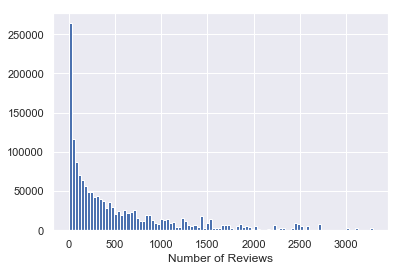

In [92]:
reviews.review_count.hist(bins=100)
plt.xlabel('Number of Reviews')
plt.show()

#### I am going to select 100 reviews as the threshold for beers to consider recommending based on overrall score. This will include ~70% of the beers reviewed in the dataset.

In [84]:
reviews.query('review_count >= 100').count()/df['beer_beerid'].count()*100

beer_beerid       70.564296
review_overall    70.564296
review_count      70.564296
dtype: float64

#### We can now find the beers with the highest average overall review score that were reviewed atleast 100 times.

In [112]:
reviews['overall_mean'] = reviews.groupby('beer_beerid')['review_overall'].transform('mean')
over100 = reviews.query('review_count >= 100').groupby('beer_beerid')
over100.head(1).sort_values('overall_mean', ascending = False).head(3)

c:\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,beer_beerid,beer_name,review_overall,review_count,overall_mean
334855,56082,Citra DIPA,4.0,252,4.630952
482051,36316,Cantillon Blåbær Lambik,5.0,156,4.628205
378243,16814,Heady Topper,4.5,469,4.625800


## Answer: 3 Recommended beers are (Citra DIPA, Cantillon Blåbær Lambik, Heady Topper )